### Plotting the ADCP spectra

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")

from pyspec import spectrum

from plots_aux import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 14 days


Little tweaks in the matplotlib configuration to make nicer plots

In [2]:
plt.rcParams.update({'font.size': 12
    , 'legend.markerscale': 1., 'axes.titlesize': 12, 'axes.labelsize' : 12,
      'legend.fontsize' : 10,'legend.handlelength': 3})

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)

Define nice colors

In [3]:
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
lw1=1
aph=.7

### Load data

In [4]:
data_path = './outputs/'
slab1=np.load(data_path+'adcp_spec_slab1.npz')
slab2=np.load(data_path+'adcp_spec_slab2.npz')
slab3=np.load(data_path+'adcp_spec_slab3.npz')
slab2ns=np.load(data_path+'adcp_spec_slab2ns.npz')
kK = slab1['kK1']

In [5]:
# scaling factor to account for the variance reduced by hanning window
k1 = slab1['k']
w = np.hanning(k1.size)
Nw = k1.size/w.sum()
Nw

2.0259740259740266

In [6]:
## -2 and -3 slopes in the loglog space
ks = np.array([1.e-3,1])
Es2 = .275e-4*(ks**(-2))
Es3 = 1.8e-6*(ks**(-3))
rd1 = 22.64 # [km]
Enoise = np.ones(2)*2.*1.e-4

def add_second_axis(ax1):
    """ Add a x-axis at the top of the spectra figures """
    ax2 = ax1.twiny() 
    ax2.set_xscale('log')
    ax2.set_xlim(ax1.axis()[0], ax1.axis()[1])
    kp = 1./np.array([500.,200.,100.,40.,20.,10.,5.])
    lp=np.array([500,200,100,40,20,10,5])
    ax2.set_xticks(kp)
    ax2.set_xticklabels(lp)
    plt.xlabel('Wavelength [km]')

def plt_adcp_spectrum(slab,vlevel=1,lw=3):
    """ Plots ADCP spectrum in the given vertical level 
            slab is a dictionary contaning the spectra """
    
    if vlevel==1:
        ltit = r'26-50 m, 232 DOF' 
        fig_num = 'a'
    elif vlevel==2:
        ltit=r'58-98 m, 238 DOF'
        fig_num = 'b'
    elif vlevel==3:
        ltit=r'106-202 m, 110 DOF'
        fig_num = 'c'

    
    fig = plt.figure(facecolor='w', figsize=(12.,10.))
    ax1 = fig.add_subplot(111)

    ax1.set_rasterization_zorder(1)
    
    ax1.fill_between(slab['k'],slab['Eul']/2.,slab['Euu']/2., color=color1,\
                     alpha=0.35, zorder=0)
    ax1.fill_between(slab['k'],slab['Evl']/2.,slab['Evu']/2.,\
                     color=color2, alpha=0.35,zorder=0)
    ax1.set_xscale('log'); ax1.set_yscale('log')

    ax1.loglog(slab['k'],slab['Eu']/2.,color=color1,\
               linewidth=lw,label=r'$\hat{C}^u$: across-track',zorder=0)
    ax1.loglog(slab['k'],slab['Ev']/2.,color=color2,\
               linewidth=lw,label=r'$\hat{C}^v$: along-track',zorder=0)

    ax1.loglog(kK,slab['Kpsi']/2,color=color3,linewidth=lw,\
               label='$\hat{C}^\psi$: rotational',zorder=0)
    ax1.loglog(kK,slab['Kphi']/2,color=color4,linewidth=lw,\
               label='$\hat{C}^\phi$: divergent',zorder=0)

    ax1.loglog(slab['ks'],slab['Enoise']/2., color='.5',alpha=.7,\
               linewidth=lw1,label='instrumental error',zorder=0)

    
    ax1.loglog(ks,Es2,'-', color='0.5',linewidth=2.,zorder=0)
    ax1.loglog(ks,Es3,'-', color='0.5',linewidth=2.,zorder=0)

    ax1.axis((1./(1000),1./4,.4e-5,10))
    
    plt.text(0.0011, 5.41,u'-2')
    plt.text(0.0047, 5.51,u'-3')
    
    plt.xlabel('Along-track wavenumber [cpkm]')
    plt.ylabel(u'KE spectral density [ m$^{2}$ s$^{-2}$/ cpkm]')
    
    lg = plt.legend(loc=(.01,.075),title=ltit, numpoints=1,ncol=2)
    lg.draw_frame(False)

    plt.axis((1./1.e3,1./5.,.5/1.e4,1.e1))

    plt.text(1/20., 5., "ADCP", size=25, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

    plt.text(1/6.5, 4.5, fig_num, size=35, rotation=0.)

    add_second_axis(ax1)
    
    plt.savefig('figs/spec_adcp_slab'+str(vlevel)+'_bcf_decomp_ke',bbox_inches='tight')
    plt.savefig('figs/spec_adcp_slab'+str(vlevel)+'_bcf_decomp_ke.eps'\
                , rasterized=True, dpi=300)

### Call the function to plot the spectra

/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4666: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4667: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4670: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
/Users/crocha/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:4672: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
/Users/crocha/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


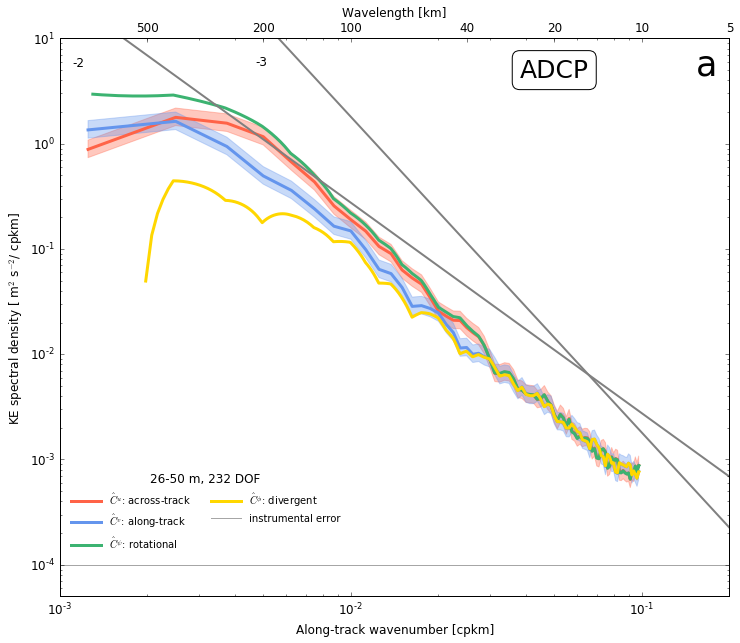

In [7]:
## 26-50 m
plt_adcp_spectrum(slab1,vlevel=1)

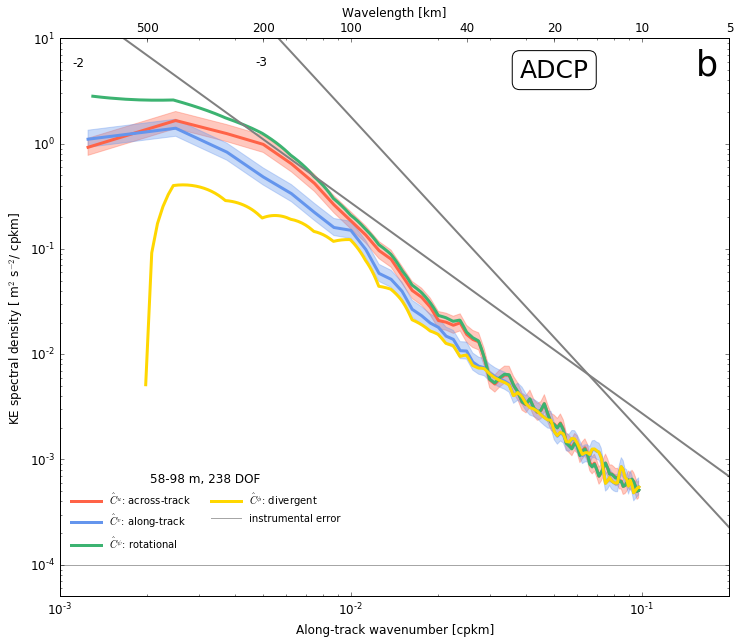

In [8]:
##  58-98 m
plt_adcp_spectrum(slab2,vlevel=2)

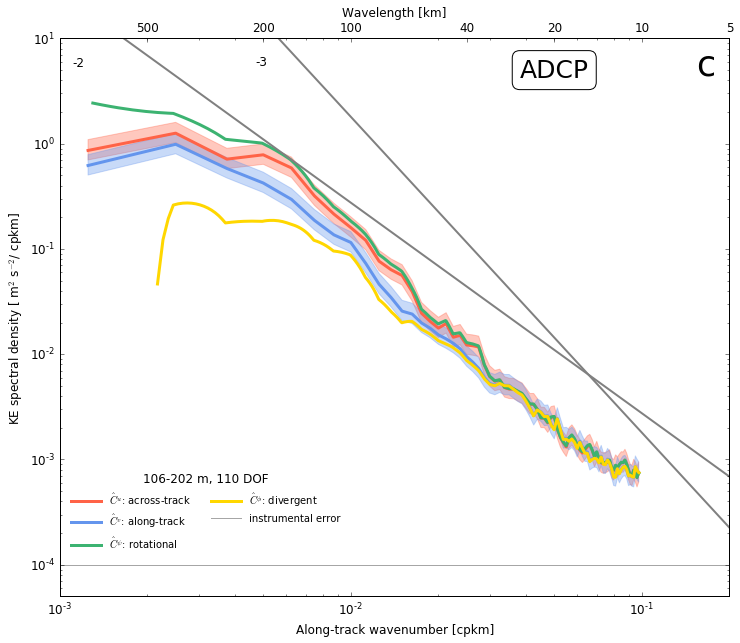

In [9]:
## 106-202 m
plt_adcp_spectrum(slab3,vlevel=3)

### Now plot the spectra for sub-transects to the north and south of the polar front

In [10]:
win = np.hanning(slab2ns['kns'].size)
fac = (slab2ns['kns'].size/(win**2).sum())

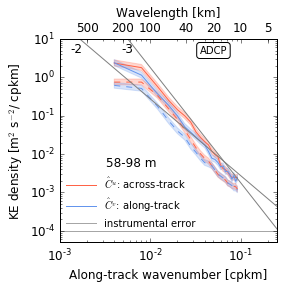

In [11]:
fig = plt.figure(figsize=(8.27/2-.25,11.69/3-.25))
ax1 = fig.add_subplot(111)

ax1.fill_between(slab2ns['kns'],fac*slab2ns['Euln']/2,fac*slab2ns['Euun']/2, color=color1, alpha=0.25)
ax1.fill_between(slab2ns['kns'],fac*slab2ns['Evln']/2,fac*slab2ns['Evun']/2, color=color2, alpha=0.25)

ax1.fill_between(slab2ns['kns'],fac*slab2ns['Euls']/2,fac*slab2ns['Euus']/2, color=color1, alpha=0.25)
ax1.fill_between(slab2ns['kns'],fac*slab2ns['Evls']/2,fac*slab2ns['Evus']/2, color=color2, alpha=0.25)
ax1.set_xscale('log'); ax1.set_yscale('log')

ax1.loglog(slab2ns['kns'],fac*slab2ns['Eun']/2,color=color1,linewidth=lw1,label='$\hat{C}^u$: across-track')
ax1.loglog(slab2ns['kns'],fac*slab2ns['Evn']/2,color=color2,linewidth=lw1,label='$\hat{C}^v$: along-track')
ax1.loglog(slab2ns['kns'],fac*slab2ns['Eus']/2,'--',color=color1,linewidth=lw1)
ax1.loglog(slab2ns['kns'],fac*slab2ns['Evs']/2,'--',color=color2,linewidth=lw1)

#ax1.loglog(slab2ns['kKn'],slab2ns['Kpsin']/2,color=color3,linewidth=2.,
#           label='$\hat{C}^\psi$: rotational')
#ax1.loglog(slab2ns['kKn'],slab2ns['Kphin']/2,color=color4,linewidth=2.,
#           label='$\hat{C}^\phi$: divergent')

#ax1.loglog(slab2ns['kKs'],slab2ns['Kpsis']/2,'--',color=color3,linewidth=2.)
#ax1.loglog(slab2ns['kKs'],slab2ns['Kphis']/2,'--',color=color4,linewidth=2.)

ax1.loglog(slab2ns['ks'],slab2ns['Enoise']/2., color='.5',alpha=.7, linewidth=lw1,label='instrumental error')

#plt_spec_error(sn = 164)
ax1.loglog(ks,Es2,'-', color='0.5',linewidth=1.)
ax1.loglog(ks,Es3,'-', color='0.5',linewidth=1.)
plt.text(0.0013, 4.25,u'-2')
plt.text(0.00475, 4.25,u'-3')
    

plt.xlabel('Along-track wavenumber [cpkm]')
plt.ylabel(u'KE density [m$^{2}$ s$^{-2}$/ cpkm]')
    
lg = plt.legend(loc=(.01,.05),title=r"58-98 m", numpoints=1,ncol=1)
lg.draw_frame(False)

plt.axis((1./1.e3,1./4.,.5/1.e4,1.e1))


plt.text(1/20., 5., "ADCP", size=10, rotation=0.,
             ha="center", va="center",
             bbox = dict(boxstyle="round",ec='k',fc='w'))

#plt.text(0.7, 4.5, 'd', size=35, rotation=0.)

add_second_axis(ax1)
    
plt.savefig('figs/spec_adcp_slab2ns',bbox_inches='tight')
plt.savefig('figs/spec_adcp_slab2ns.eps',bbox_inches='tight')
plt.savefig('figs/spec_adcp_slab2ns.pdf',bbox_inches='tight')

In [12]:
from pyspec import spectrum as spec

In [13]:
ki, Eui =  spec.avg_per_decade(slab1['k'],slab1['Eu'].real,nbins = 10)
ki, Evi =  spec.avg_per_decade(slab1['k'],slab1['Ev'].real,nbins = 10)

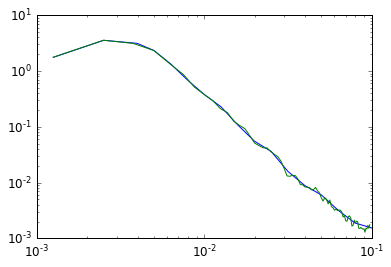

In [14]:
plt.loglog(ki,Eui)
#plt.loglog(ki,Evi)
plt.loglog(slab1['k'],slab1['Eu'])
#plt.loglog(slab1['k'],slab1['Ev'])

In [15]:
from pyspec import helmholtz as helm

In [16]:
E = 1./ki**3/1e10
helm_slab1 = helm.BCFDecomposition(ki,3*E,E)
#helm_slab1 = helm.BCFDecomposition(slab1['k'],3*slab1['Ev'],slab1['Ev'])

AttributeError: 'module' object has no attribute 'BCFDecomposition'

In [ ]:
plt.loglog(ki,helm_slab1.Cpsi,'r')
plt.loglog(ki,helm_slab1.Cphi,'y')
plt.loglog(ki,3*E/2,'b')
plt.loglog(ki,E/2,'g')

#plt.loglog(slab1['k'],helm_slab1.Cpsi,'r')
#plt.loglog(slab1['k'],helm_slab1.Cphi,'y')
#plt.loglog(slab1['k'],3*slab1['Ev']/2,'m')
#plt.loglog(slab1['k'],slab1['Ev']/2,'g')

In [ ]:
slab1['k'].size

In [ ]:
dk = 1./(800.)

In [ ]:
k = np.arange(0,160/2.)*dk

In [ ]:
)
plt.loglog(k[1:79],slab2['Eu'],'m')

